# Analysis of wines assayed by indicator displacement assay in the Anslyn lab, 2010

Features are sensors used in assays

In [1]:
import pandas as pd
import numpy as np

In [2]:
awines = pd.read_csv("5wines0720.csv", encoding="utf-8")

In [3]:
awines2 = awines.iloc[0: , 1:]

In [4]:
data = np.array(awines2)

In [5]:
data

array([[ 0.0829,  0.0823,  0.4011, ...,  0.3121,  0.0892,  0.0919],
       [ 0.0817,  0.0837,  0.4054, ...,  0.3159,  0.0908,  0.0896],
       [ 0.0826,  0.0915,  0.4109, ...,  0.3222,  0.0903,  0.0903],
       ..., 
       [ 0.0668,  0.0687,  0.4934, ...,  0.3844,  0.0972,  0.1006],
       [ 0.0712,  0.0713,  0.4972, ...,  0.3819,  0.0947,  0.1037],
       [ 0.0694,  0.0699,  0.4997, ...,  0.3802,  0.0992,  0.1042]])

In [6]:
from sklearn.decomposition import PCA

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
target = awines["Unnamed: 0"]

In [9]:
type(target)

pandas.core.series.Series

In [10]:
target = np.array(target)

In [11]:
target

array([u'Beaujolais', u'Beaujolais', u'Beaujolais', u'Beaujolais',
       u'Beaujolais', u'Beaujolais', u'Beaujolais', u'Beaujolais',
       u'Cabernet', u'Cabernet', u'Cabernet', u'Cabernet', u'Cabernet',
       u'Cabernet', u'Cabernet', u'Cabernet', u'Merlot', u'Merlot',
       u'Merlot', u'Merlot', u'Merlot', u'Merlot', u'Merlot', u'Merlot',
       u'Pinot Noir', u'Pinot Noir', u'Pinot Noir', u'Pinot Noir',
       u'Pinot Noir', u'Pinot Noir', u'Pinot Noir', u'Pinot Noir',
       u'Shiraz', u'Shiraz', u'Shiraz', u'Shiraz', u'Shiraz', u'Shiraz',
       u'Shiraz', u'Shiraz', u'Zinfandel BS', u'Zinfandel BS',
       u'Zinfandel BS', u'Zinfandel BS', u'Zinfandel BS', u'Zinfandel BS',
       u'Zinfandel BS', u'Zinfandel BS', u'Zinfandel BT', u'Zinfandel BT',
       u'Zinfandel BT', u'Zinfandel BT', u'Zinfandel BT', u'Zinfandel BT',
       u'Zinfandel BT', u'Zinfandel BT', u'Zinfandel C', u'Zinfandel C',
       u'Zinfandel C', u'Zinfandel C', u'Zinfandel C', u'Zinfandel C',
       u'Zinfa

In [12]:
from sklearn import preprocessing

In [13]:
target_le = preprocessing.LabelEncoder()

In [14]:
target = target_le.fit_transform(target)

In [15]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8,
       8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9])

In [16]:
from mpl_toolkits.mplot3d import Axes3D

In [17]:
np.random.seed(5)

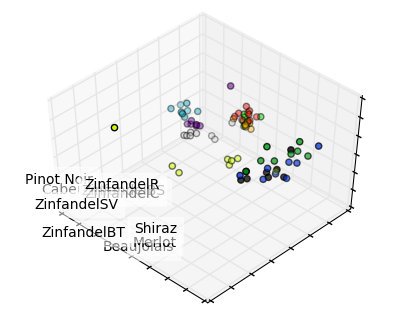

In [18]:
centers = [[1, 1], [-1, -1], [1, -1]]
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0,0,.95,1], elev=48, azim=134)
plt.cla()

pca = PCA(n_components=3)
pca.fit(data)
data = pca.transform(data)

for name, label in [('Beaujolais', 0), ('Cabernet', 1), ('Merlot', 2), ('Pinot Noir', 3), ('Shiraz', 4), ('ZinfandelBS', 5), ('ZinfandelBT', 6), ('ZinfandelC', 7), ('ZinfandelR', 8), ('ZinfandelSV', 9)]:
    ax.text3D(data[target == label, 0].mean(),
             data[target == label, 1].mean() + .3,
             data[target == label, 2].mean(), name,
             horizontalalignment='center',
             bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
target_ = np.choose(target, [1,2,3,4,5,6,7,8,9,0]).astype(np.float)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=target, cmap=plt.cm.spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [19]:
pca.explained_variance_

array([ 0.00824568,  0.00231188,  0.00068894])

In [20]:
pca.explained_variance_ratio_

array([ 0.70124122,  0.19661026,  0.05858957])

Results here were the same obtained from analysis using XLSTAT!